In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import scipy
from sklearn.linear_model import LinearRegression


In [4]:
df = pd.read_excel("./data/example_failure_data_sets.xlsx", sheet_name="CSR3", engine="openpyxl")
df2 = pd.read_excel("./data/example_failure_data_sets.xlsx", sheet_name="CSR1", engine="openpyxl")

In [5]:
# scipy.optimize.curve_fit(f, x, y)

# def func(x):
#     return 
    
class double_reg:
    def __init__(self, degree = 1, increment = 0.1):
        self.increment = increment
        self.params = []
        self.param_list = []
        self.degree = degree
        self.discount = 0.1
    
    def fit(self, x, y):
        for i in range(0, self.degree + 1):
            self.params.append(0)
        for i in range(0, int(1/self.increment) ): #int(1/self.increment/2)
            mod = np.polyfit(x[int(self.increment *len(x) * i):int(self.increment *len(x) * (i+1)) ], y[int(self.increment *len(x) * i):int(self.increment *len(x) * (i+1)) ], self.degree)
            self.param_list.append(mod)
        for i in range(0, self.degree + 1):
            mod = np.polyfit(range(len(self.param_list)), [x[i] for x in self.param_list], self.degree, w = [np.power(self.discount, point) for point in range(len(self.param_list) + 1,1, -1 )]) #, w = [point for point in range(1, len(self.param_list) + 1)]
            val = 0
            for j in range(len(mod)):
                val += np.power(len(self.param_list), j) * mod[-(j+1)]
            
            if i == 0:
                print(val)
            #uncommment to also take the average of the prediction and the average of the last two points. 
#             val += (self.param_list[-1][i] + self.param_list[-2][i])/2
#             val = val / 2
            self.params[i] = val
            
#         mod.fit(range(0,len(self.param_list)), [x[0] for x in self.param_list[:]], 1) 
        reg = LinearRegression().fit(np.array(range(0,10)).reshape(-1,1), [x[0] for x in self.param_list[-10:]])
        print(reg.coef_)
        plt.plot(range(len(self.param_list)), [x[0] for x in self.param_list ])
        plt.plot(range(len(self.param_list)), reg.predict(np.array([x[0] for x in self.param_list ]).reshape(-1,1) ))
        plt.show()
        
        
        
        
        return 0
            
            
        
    def predict(self, x):
        result = []
        for val in x:
            y = 0
            for j in range(len(self.params)):
                y += np.power(val, j) * self.params[-(j + 1)]
            result.append(y)
        
        return result
            

0.007366577921611488
[-0.00037148]


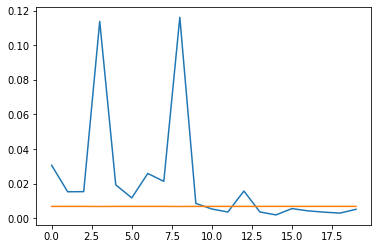

[97.28796254944835, 98.00988718576627, 104.52194206847084, 106.08365658785246, 108.19786445135496, 108.58829308120038, 108.61039281496521, 114.73201906782435, 115.04878191845364, 115.45394370414228, 116.25690069759793]


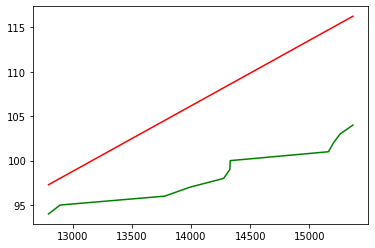

In [6]:
mod = double_reg(increment=0.05, degree = 1)
mod.fit(df["FT"][:int(0.9* len(df["FT"]))], df["FN"][:int(0.9* len(df["FN"]))])
res = mod.predict(df["FT"][int(0.9* len(df["FT"])):])
print(res)
plt.plot(df["FT"][int(0.9* len(df["FT"])):], res, color="red")
plt.plot(df["FT"][int(0.9* len(df["FT"])):], df["FN"][int(0.9* len(df["FT"])):], color="green")

6.559614041746695e-05
[-0.00170708]


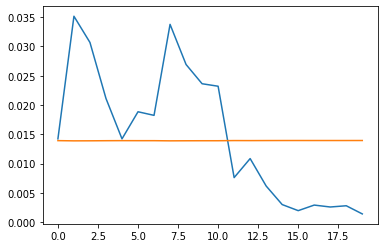

[332.2643961428885, 332.3069680380194, 332.3097886720573, 332.3219239580346, 332.3322225520801, 332.33419043629266, 332.450361200972, 332.5217298017462, 332.5582012558183, 332.56180904354125, 332.8827053624635, 332.8880186498373, 332.89202001440276, 332.9232437772415, 332.9273763340878, 332.92757312250905, 332.9277699109303, 332.93183687163616, 332.9319024677766, 332.93478869795496, 333.015865527511, 333.1080937009379, 333.11524368024345, 333.2117356027975, 333.3296118671277, 333.44433951671783, 333.5818290270329, 333.5868143337046, 333.72896116998925, 333.86402362310884, 334.0068264207976, 334.1309999146079, 334.1439879504106, 334.36216071343904, 334.5655087487332, 334.60394808701784, 334.78013932017916, 334.7882732415909, 334.8032947577465, 334.86941566728734]


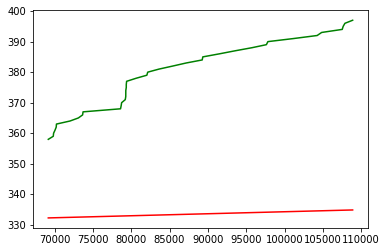

In [7]:
mod = double_reg(increment=0.05, degree=1)
mod.fit(df2["FT"][:int(0.9* len(df2["FT"]))], df2["FN"][:int(0.9* len(df2["FN"]))])

res = mod.predict(df2["FT"][int(0.9* len(df2["FT"])):])
print(res)
plt.plot(df2["FT"][int(0.9* len(df2["FT"])):], res, color="red")
plt.plot(df2["FT"][int(0.9* len(df2["FT"])):], df2["FN"][int(0.9* len(df2["FT"])):], color="green")

In [8]:
y_actual = list(df2["FN"][int(0.9* len(df2["FT"])):])
mse = 0
print(res, y_actual)
for i in range(len(res)):
    mse+= (y_actual[i] - res[i])**2
print(mse/len(res))

[332.2643961428885, 332.3069680380194, 332.3097886720573, 332.3219239580346, 332.3322225520801, 332.33419043629266, 332.450361200972, 332.5217298017462, 332.5582012558183, 332.56180904354125, 332.8827053624635, 332.8880186498373, 332.89202001440276, 332.9232437772415, 332.9273763340878, 332.92757312250905, 332.9277699109303, 332.93183687163616, 332.9319024677766, 332.93478869795496, 333.015865527511, 333.1080937009379, 333.11524368024345, 333.2117356027975, 333.3296118671277, 333.44433951671783, 333.5818290270329, 333.5868143337046, 333.72896116998925, 333.86402362310884, 334.0068264207976, 334.1309999146079, 334.1439879504106, 334.36216071343904, 334.5655087487332, 334.60394808701784, 334.78013932017916, 334.7882732415909, 334.8032947577465, 334.86941566728734] [358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397]
2069.156235155835
